# <font color="#008080">HW # 4: Clustering data using K-means and validation indexes algorithm</font>

#### Profesor: EMILIO BAROCIO ESPEJO
#### Alumno: Ortega Camargo Fernando
#### GitHub Tarea 4:
###### https://github.com/Fortega95/MEM_MCD/blob/main/Tarea4_Fernando_MEM.ipynb
Fecha: 12-03-24

Clustering is a broad set of techniques for finding subgroups of observations within a data
set. Clustering allows us to identify which observations are alike, and potentially categorize
them therein.

**Objective:** In this HW, K-means and validation indexes are used in a complementary way
to determine the optimal number of groups. Additionally, the pointed out connected
algorithms are complemented with a dimensional reduction technique to grouping data
information.

In [1]:
## importamos librerias
import os                                 #Liberia de manejo de sistema operativo

import pandas as pd                       #librerias de manejo ed arrays y dataframes
import numpy as np 
                                          # librerias de graficación
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")


##  <font color="#008080">Introducción</font>

### Data set Iris
La colección de datos iris constituye una valiosa fuente de información que ha sido ampliamente empleada en los ámbitos de la estadística y el aprendizaje automático.
Esta base de datos fue creada en 1936 por el estadístico británico y biólogo Ronald Fisher y su principal aplicación radica en la clasificación de distintas especies de plantas iris, las cuales se dividen en tres tipos, Setosa, versicolor y Virginia.
Las plantas iris son un género de plantas con flores que se caracterizan por tener flores vistosas con tres pétalos y tres sépalos.Hay diversas especies de iris, y su apariencia puede variar, pero comúnmente tienen hojas largas y verticales. 

Esta base de datos proporciona medidas detalladas de longitud y ancho tanto del pétalo como del sépalo, permitiendo así analizar la proporción de cada planta, incluye tres especies de iris con 50 muestras cada una (150 en total), así como algunas propiedades sobre cada flor. 


Las columnas en este conjunto de datos son:

* Id
* Longitud del Sépalo (cm)
* Ancho del Sépalo (cm)
* Longitud del Pétalo (cm)
* Ancho del Pétalo (cm)
* Especie


Definiciones  
**Sepalo:** El sépalo es una parte de la flor que forma el cáliz, la capa externa del perianto. Funciona para proteger el botón floral y, en algunas plantas, participa en la polinización. Puede tener diferentes colores y formas, contribuyendo a la estética de la flor. Su función principal es proporcionar protección y soporte estructural.  
**Petalo:** Los pétalos son las partes coloridas de una flor que forman la corola. Tienen la función de atraer polinizadores con colores y fragancias, y también pueden ofrecer protección a las partes reproductoras de la flor durante su desarrollo.

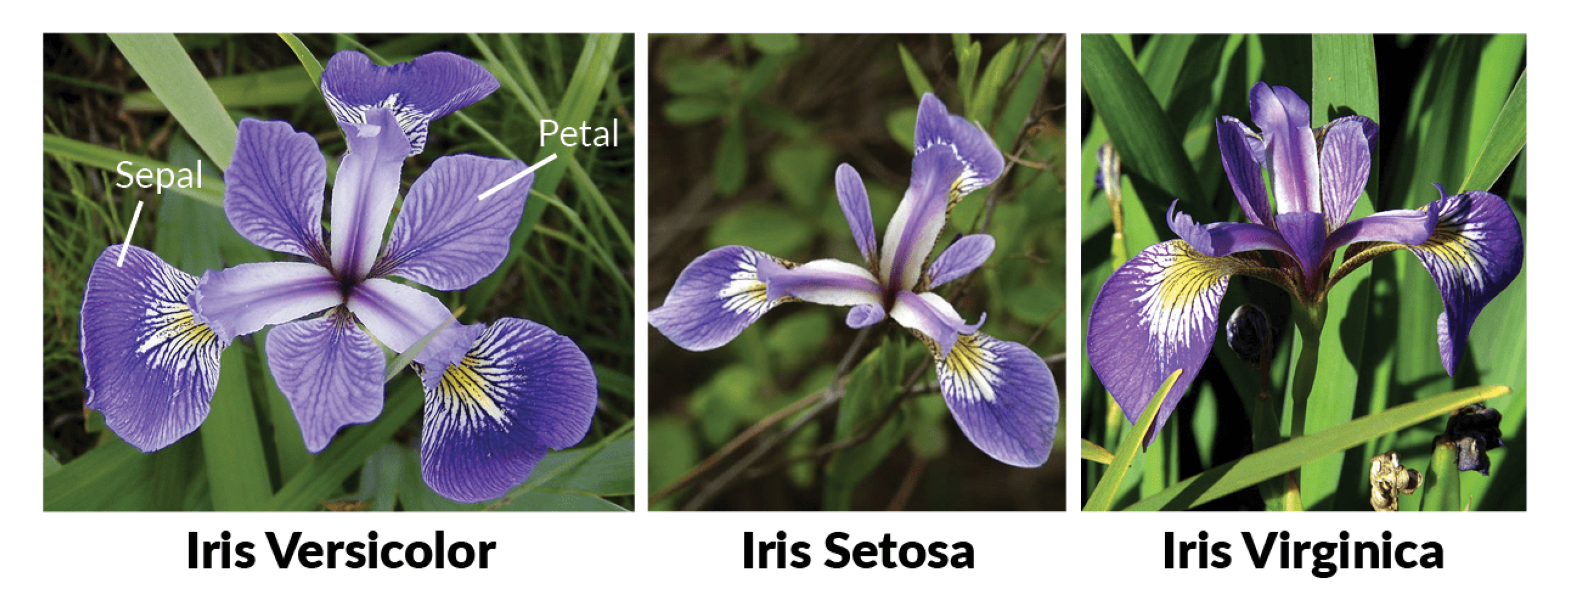

In [2]:
plt.figure(figsize=(20,10))
plt.imshow(mpimg.imread("iris.especie.png"))
plt.axis('off') 
plt.grid(False) 

### Clustering

El análisis de clusters, una técnica sofisticada en estadística y aprendizaje no supervisado, se emplea para la segmentación de conjuntos de datos en subconjuntos homogéneos. Este proceso implica la asignación de observaciones a grupos, conocidos como "clusters", con la premisa fundamental de maximizar la similitud intra-cluster y minimizar la similitud inter-cluster. El objetivo es discernir patrones subyacentes y estructuras intrínsecas en los datos, prescindiendo de etiquetas predefinidas.  

En esta metodología, se reconoce la capacidad inherente de los datos para organizarse de manera natural en conjuntos distintos, lo que facilita la interpretación y comprensión de las relaciones entre las variables. Para llevar a cabo este análisis, se recurre a diversos algoritmos de clustering, siendo el algoritmo K-means uno de los más prominentes. Este enfoque busca dividir el conjunto de datos en K clusters, donde K es un parámetro predefinido. El algoritmo ajusta iterativamente la asignación de observaciones a clusters y los centroides correspondientes para minimizar la suma de las distancias al cuadrado entre los puntos y los centroides.

El análisis de clusters, con su aplicabilidad extendida, abarca disciplinas como la segmentación de mercado, la clasificación de especies en biología, y la organización de documentos en minería de textos. En situaciones donde se busca identificar patrones o estructuras intrínsecas en conjuntos de datos no etiquetados, esta técnica se convierte en una herramienta valiosa. La elección del algoritmo y la interpretación de los resultados dependen, de manera crucial, del contexto específico y los objetivos detallados de la investigación.

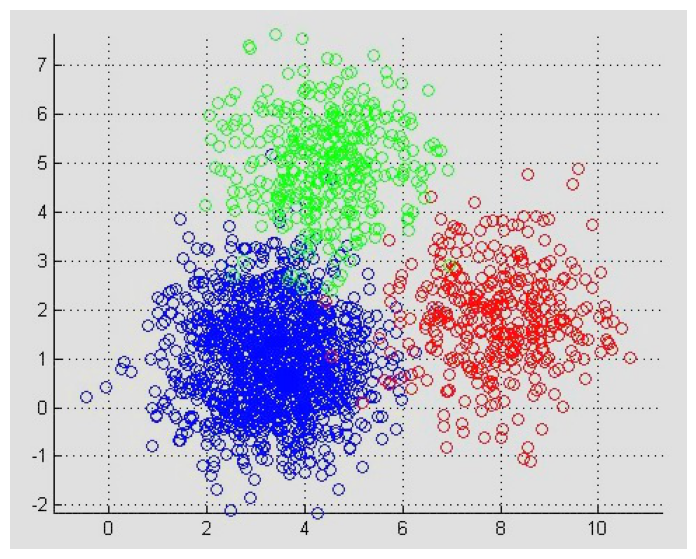

In [3]:
plt.figure(figsize=(15,7))
plt.imshow(mpimg.imread("clusters.jpg"))
plt.axis('off')  
plt.grid(False)  

### PCA

El Análisis de Componentes Principales (PCA) emerge como una herramienta avanzada en estadística multivariantea. Este método no supervisado busca reducir la dimensionalidad de conjuntos de datos, preservando al mismo tiempo la variabilidad esencial. A través de la transformación lineal de las variables originales en nuevas dimensiones no correlacionadas, denominadas componentes principales, PCA ofrece una representación más compacta y significativa de la información contenida en los datos.  

El proceso de PCA implica la identificación de los ejes de máxima variabilidad en el espacio de características original, facilitando así la visualización y comprensión de las relaciones fundamentales entre variables. La esencia de PCA radica en su capacidad para revelar patrones subyacentes, simplificando la interpretación de datos complejos. Esta técnica encuentra aplicación en diversos campos, desde la reducción de ruido en imágenes médicas hasta la identificación de patrones genéticos en la biología.

En términos más específicos, PCA se implementa mediante la descomposición de la matriz de covarianza o la matriz de correlación de los datos originales. Los autovalores y autovectores resultantes guían la construcción de los componentes principales, con los autovalores indicando la proporción de varianza explicada por cada componente. La selección de un número adecuado de componentes principales constituye un aspecto crítico y puede determinarse a través de criterios como la proporción acumulada de varianza explicada.

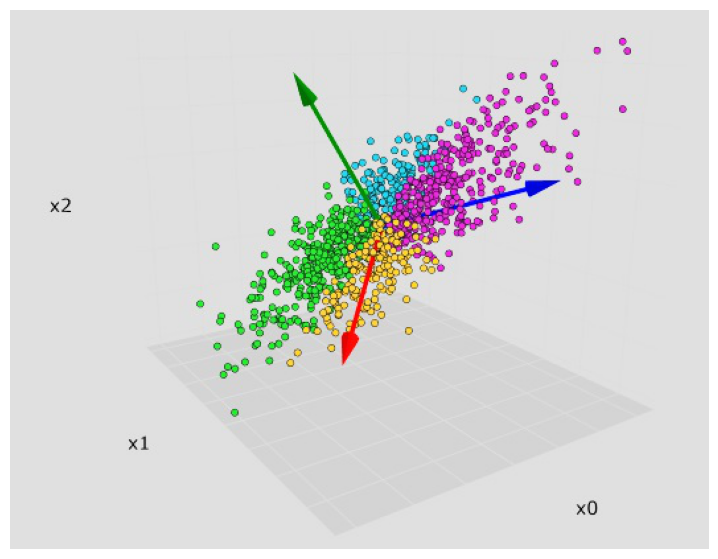

In [4]:
plt.figure(figsize=(15,7))
plt.imshow(mpimg.imread("PCA.jpg"))
plt.axis('off')  
plt.grid(False)  

##  <font color="#008080">Desarrollo</font>

**Instructions for dataset:**
1. Download the dataset from https://www.kaggle.com/uciml/iris?select=Iris.csv

####  <font color="#008080">Descripción de la base</font>

Como mencionamos en la introducción,el data set incluye información de una muestra de 150 flores "iris" segmentadas por especie y detallando las siguientes medidas númericas: Ancho del sepalo, Largo de sepalo, Ancho de petalo y longitud del petalo.
Carguemos el dataset y empecemos con la descripción de la base.

In [5]:
iris=pd.read_csv("D://Maestria//git//MEM_MCD//Bases//Iris.csv",index_col=0)   #Cargamos la base

####  <font color="#008080">Análisis rápido de estructura</font>

In [6]:
iris.head(5)   #vemos primeros renglones de la base

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
## datos generales de estructura

print(f"Dimension de la base iris: {iris.shape}")
print("###Columnas:")
print(list(iris.columns))

Dimension de la base iris: (150, 5)
###Columnas:
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [8]:
iris.info()   # informacion general de estructura, nulos, y tipo de dato

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [9]:
iris.describe(include="all")    #análisis estadístico rápido

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
iris.Species.value_counts()   #validamos la cantidad de datos por categoría

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
iris.dtypes    #validamos el tipo de dato en python

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

####  <font color="#008080">Resumen</font>

* El data set cuenta con 150 datos divididos en 3 subcategorias: setosa, versicolor y virginica con 50 datos dentro de cada categoría
* El data set esta dividido en 5 atributos, 4 numéricos flotantes (SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm) y un  uno de tipo string (Specie)
* No se tienen valores nulos


**Instructions using PCA:**    
   
<font color="red">**1. Apply PCA or SVD for X**</font>

En nuestro caso de estudio aplicaremos la técnica de reducción de dimensionalidad llamada PCA, la cual se encarga mediante una transformaciónlineal, obtener la significancia de las dimensiones más relevantes a partir de los eigenvalores de nuestros datos,por lo que dependiendo de nuestro caso podremos reducir la dimensionalidad de nuestro conjunto usando una cantidad menor de componentes a la de variables originales con lo que conservaremos la mayor variabilidad  asi como bajaremos la complejidad de nuestros datos.

In [12]:
numerical = iris.iloc[:,:4]   #extraemos las variables numericas

Al usar las matrices de covarianza como métricas de dispersión, necesitamos estandarizar estas variabilidades, por lo que procedemos a estandarizar nuestros datos con lo que eliminaremos sesgos, y centraremos nuestros datos en una escala común permitiendole a nuestro algoritmo de PCA tener un mejor entendimiento de la varianza de cada dimensión sin considerar la escala.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_estandarizado = scaler.fit_transform(numerical)    #estandarizamos nuestras variables, Media 0 , varianza 1

Ya estandarizadas nuestras variables aplicamos el algoritmo de PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_estandarizado)

Validemos la varianza explicada de cada componente

In [15]:
j  = 1
for i in pca.explained_variance_ratio_:
    print(f"La varianza explicada de la componente {j} es {round(i,2)}")
    j+=1

La varianza explicada de la componente 1 es 0.73
La varianza explicada de la componente 2 es 0.23
La varianza explicada de la componente 3 es 0.04
La varianza explicada de la componente 4 es 0.01


In [16]:
j  = 1
acumulative = np.cumsum(pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_)
for i in acumulative:
    print(f"La varianza acumulada de la componente {j} es {round(i,2)}")
    j+=1


La varianza acumulada de la componente 1 es 0.73
La varianza acumulada de la componente 2 es 0.96
La varianza acumulada de la componente 3 es 0.99
La varianza acumulada de la componente 4 es 1.0


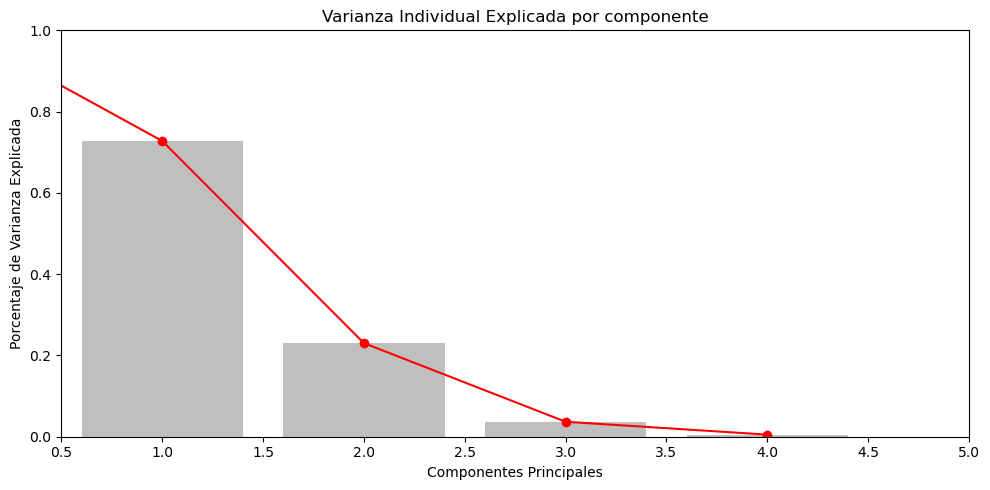

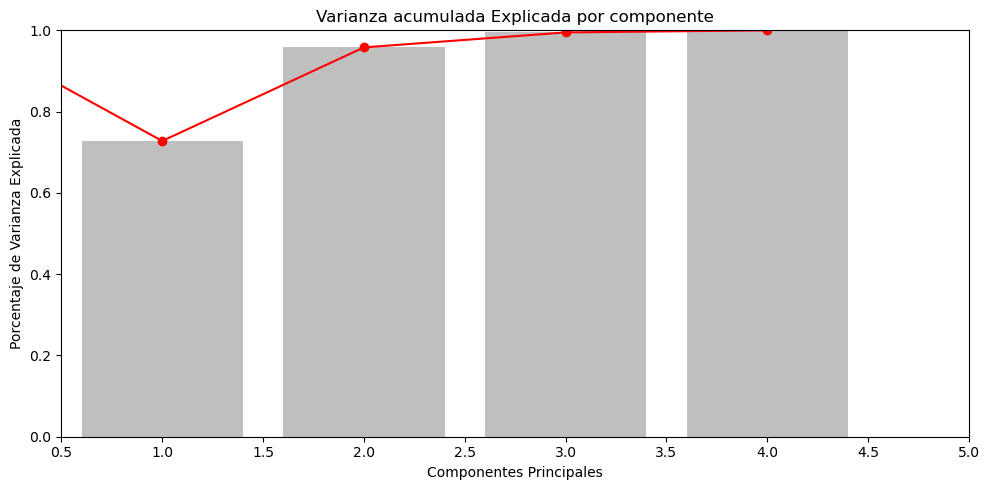

In [17]:
# Grafico de varianzas explicadas por PCA
plt.figure(figsize=(10, 5))

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_,color="grey", alpha=0.5, align='center')


plt.plot([0] + list(range(1, len(pca.explained_variance_ratio_) + 1)), [1] + list(pca.explained_variance_ratio_), marker='o', linestyle='-', color='r')

plt.title('Varianza Individual Explicada por componente')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')

plt.ylim(0, 1)  # Asegurar que el eje Y comience en 0 y termine en 1
plt.xlim(.5, len(pca.explained_variance_ratio_) + 1)  # Asegurar que el eje X comience en 0
plt.tight_layout()
plt.show()

# Grafico de varianzas acumulativas explicadas por PCA

plt.figure(figsize=(10, 5))

plt.bar(range(1, len(acumulative) + 1), acumulative,color="grey", alpha=0.5, align='center')


plt.plot([0] + list(range(1, len(acumulative) + 1)), [1] + list(acumulative), marker='o', linestyle='-', color='r')

plt.title('Varianza acumulada Explicada por componente')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')

plt.ylim(0, 1)  # Asegurar que el eje Y comience en 0 y termine en 1
plt.xlim(.5, len(acumulative) + 1)  # Asegurar que el eje X comience en 0
plt.tight_layout()
plt.show()

Como apreciamos en los análisis anteriores podemos observar que dado los componentes generados, con dos componentes tenemos aproximadamente el 96 % de la varianza explicada por lo que podemos reducir las dimensiones con esos dos componentes conservando la información esencial del data set.

<font color="red">**2. Keep only two principal vectors associated at large eigenvalues or energetic
singular values. Plot its corresponding principal vectors to obtain a scatter plot.**</font>

#### Visualicemos usando estos dos componentes nuestros datos 

In [18]:
pca_data = pd.concat([pd.DataFrame(X_pca).reset_index(),iris.Species.reset_index()],axis=1).set_index("index")

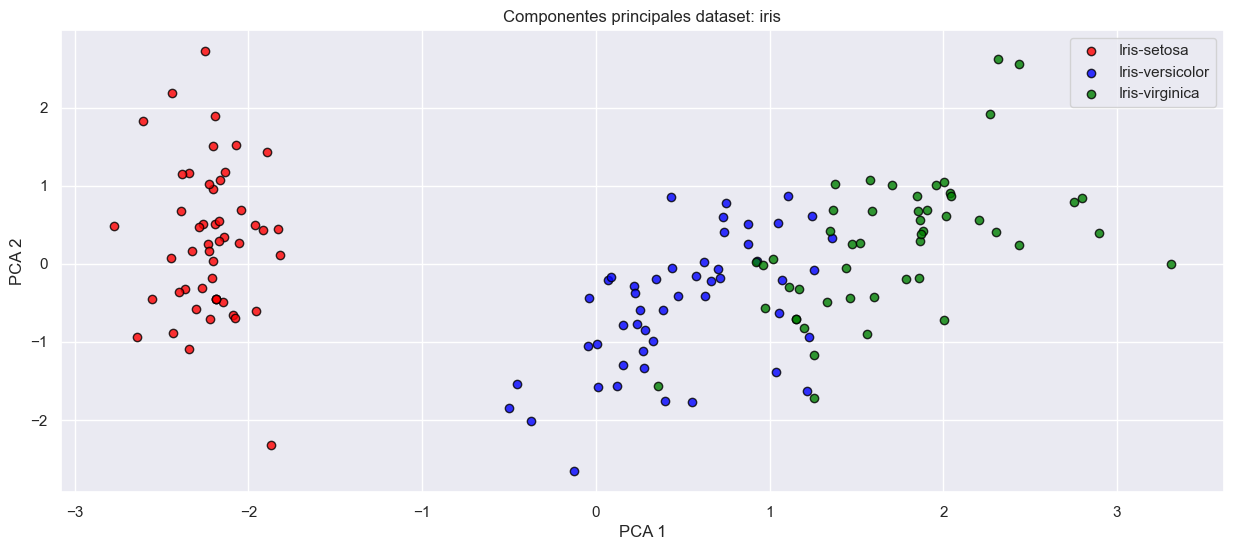

In [19]:
## visualización
sns.set()  #Definimos un formato de seaborn
plt.figure(figsize=(15,6))
colores = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}  #Generamos un mapa de especies


#graficamos nuestro scatter con las primeras dos componentes y usando como hue la especie
for i in colores:
    plt.scatter(pca_data[pca_data.Species==i].iloc[:,0],pca_data[pca_data.Species==i].iloc[:,1],alpha=0.8,color=colores[i],edgecolor="black",label=i)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.title("Componentes principales dataset: iris")

plt.show()

Como podemos visualizar estas dos componentes nos expresaneel 96 % de información de nuestro data set original, con lo que esta es una buena aproximación de la data real. Adicional vemos que separa a los grupos medianamente bien, teniendo una solapacion de clases virginica y versicolo. Esto probablemente en un futuro nos representará una problematica a la orda de aplicar algún algoritmo de agrupación.

<font color="red">**3. Apply the algorithms: K-means and two selected validation indexes (suggestion:
Davies-Bouldin index and Silhouette) to determine the optimal number of groups and provide some discussion about the results**</font>

Apliquemos el algoritmo kmeans bajo la suposicion que no tenemos las clases originales, para ello usaremos los indices de validacion para dictaminar el número óptimo de clusters

In [20]:
from sklearn.cluster import KMeans   #biblioteca para cálculo de kmeans

from sklearn.metrics import davies_bouldin_score   #bibliotecas para cálculo de indices de validación
from sklearn.metrics import silhouette_score

In [21]:
# Definamos un rango de validación, en nuestro caso con 2 clusters hasta 10
rango_validación = range(2,10) 

davies_bouldin_scores = []    #guardaremos nuestros resultados de cada iteración en estas listas
silhouette_scores = []


for n in rango_validación:
    
    kmeans = KMeans(n_clusters=n)
    
    kmeans.fit(pca_data.iloc[:,:2])

    # Predecimos los clusters
    labels = kmeans.labels_

    # guardamos métrica davies_bouldin
    davies_bouldin = davies_bouldin_score(pca_data.iloc[:,:2], labels)
    davies_bouldin_scores.append(davies_bouldin)

    # guardamos métrica Silhouette Score
    silhouette = silhouette_score(pca_data.iloc[:,:2], labels)
    silhouette_scores.append(silhouette)



Validamos visualmente nuestros resultados

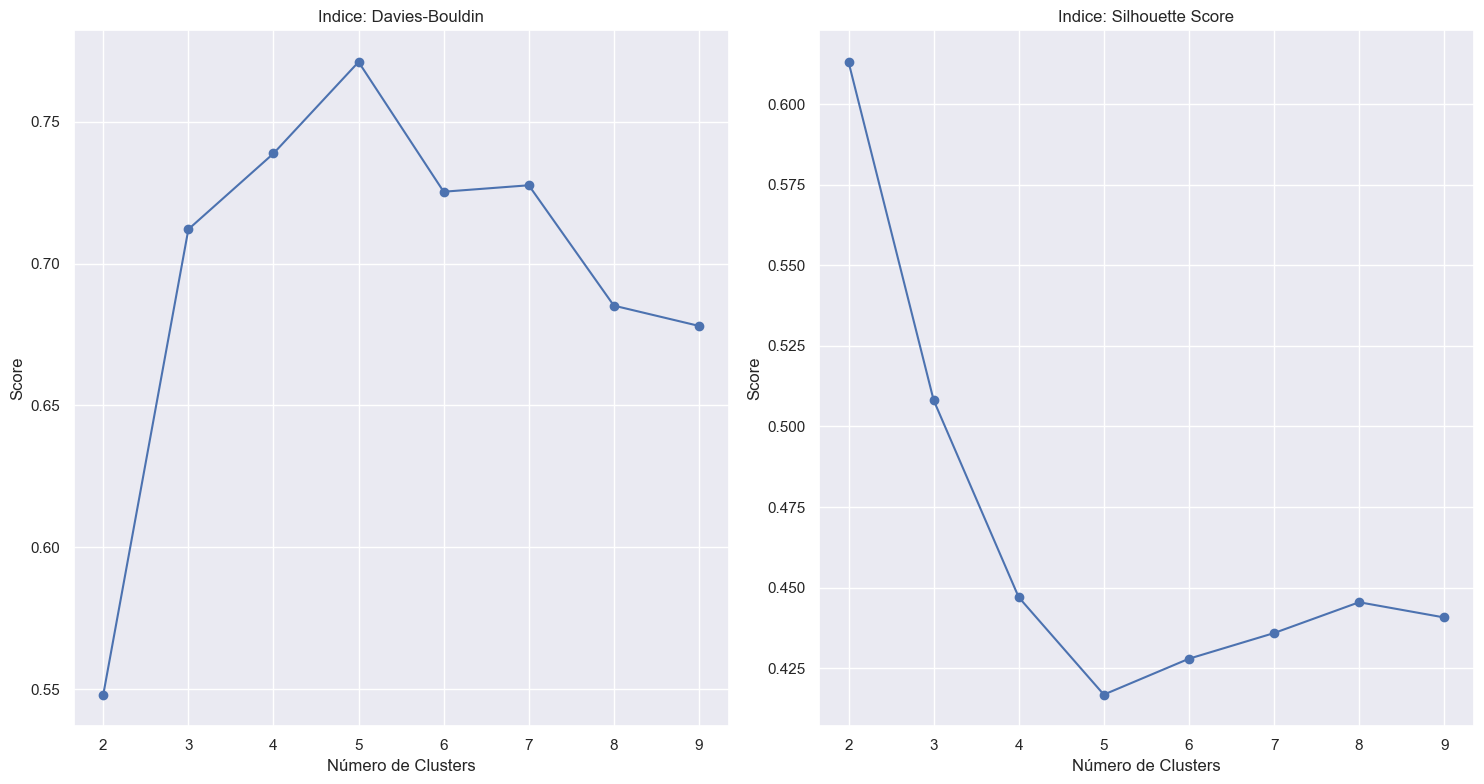

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].plot(rango_validación, davies_bouldin_scores, marker='o')
axs[0].set_title('Indice: Davies-Bouldin')
axs[0].set_xlabel('Número de Clusters')
axs[0].set_ylabel('Score')

# Configuración para Silhouette Score
axs[1].plot(rango_validación, silhouette_scores, marker='o')
axs[1].set_title('Indice: Silhouette Score')
axs[1].set_xlabel('Número de Clusters')
axs[1].set_ylabel('Score')

# Ajuste automático del diseño
plt.tight_layout()
plt.show()

Acorde a los gráficos anteriores vemos que en el cluster 2 tenemos el número menor del Indice de Davies-Bouldin asi como el valor más cercano a 1 del indice de Silhouette, esto es totalmente lógico bajo el supuesto que encontramos solapamiento de dos clases, por lo que matemáticamente, el algoritmo encuentra la mejor partición en 2 subgrupos, validemos esto con k means.

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)   #ajustamos con los datos en 2 clusters


kmeans.fit(pca_data.iloc[:,:2])

KMeans(n_clusters=2)

In [24]:
labels = pd.DataFrame(kmeans.labels_)
centroids = pd.DataFrame(kmeans.cluster_centers_)

In [25]:
k_means_data = pd.concat([pca_data.iloc[:,:2],labels],axis=1)

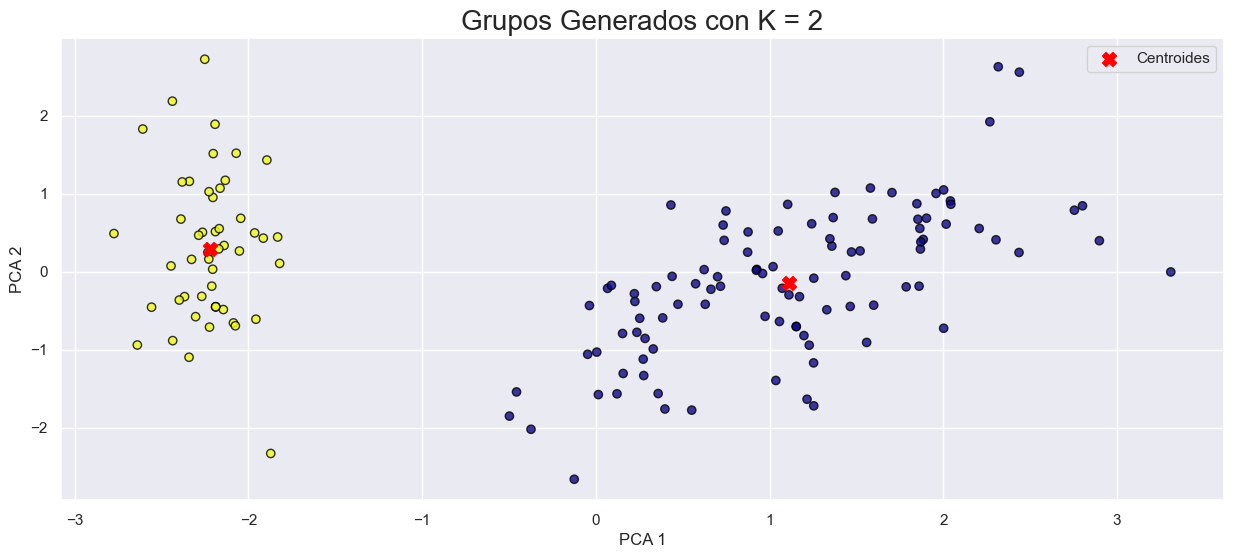

In [26]:
# Graficar los puntos y los centroides coloreados por cluster
plt.figure(figsize=(15,6))

plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], c=labels, cmap='plasma', alpha=0.8, edgecolor="black")
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.legend()

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Grupos Generados con K = 2",fontsize=20)
plt.show()

Teniendo en cuenta el gráfico anterior podemos ver el problema que presentan el solapamiento de clases con los indices que estamos utilizando, pues apriori sabemos que tenemos 3 categorias, pero data la estructura de la data, se tiene una concentración que separa principalmente en dos grupos por lo que podríamos ver que dos tipos de flores presentan caracteristicas muy similares. Es aquí donde destaca la improtancia de tener conocimiento previo o validar con un experto los clusters propuestos.

<font color="red">**4. Now, applied directly the algorithms K-means and two selected validation indexes(suggestion: Davies-Bouldin index and Silhouette) to process the original dataset X and provide some discussion about the results.**</font>

Tomemos los datos númericos originales del dataset Iris y validemos la diferencia con el uso de PCA.

In [27]:
# Definamos un rango de validación, en nuestro caso con 2 clusters hasta 10
rango_validación = range(2,10) 

davies_bouldin_scores_2 = []    #guardaremos nuestros resultados de cada iteración en estas listas
silhouette_scores_2 = []


for n in rango_validación:
    
    kmeans = KMeans(n_clusters=n)
    
    kmeans.fit(iris.iloc[:,:4])

    # Predecimos los clusters
    labels = kmeans.labels_

    # guardamos métrica davies_bouldin
    davies_bouldin = davies_bouldin_score(iris.iloc[:,:4], labels)
    davies_bouldin_scores_2.append(davies_bouldin)

    # guardamos métrica Silhouette Score
    silhouette = silhouette_score(iris.iloc[:,:4], labels)
    silhouette_scores_2.append(silhouette)



Visualicemos los datos obtenidos

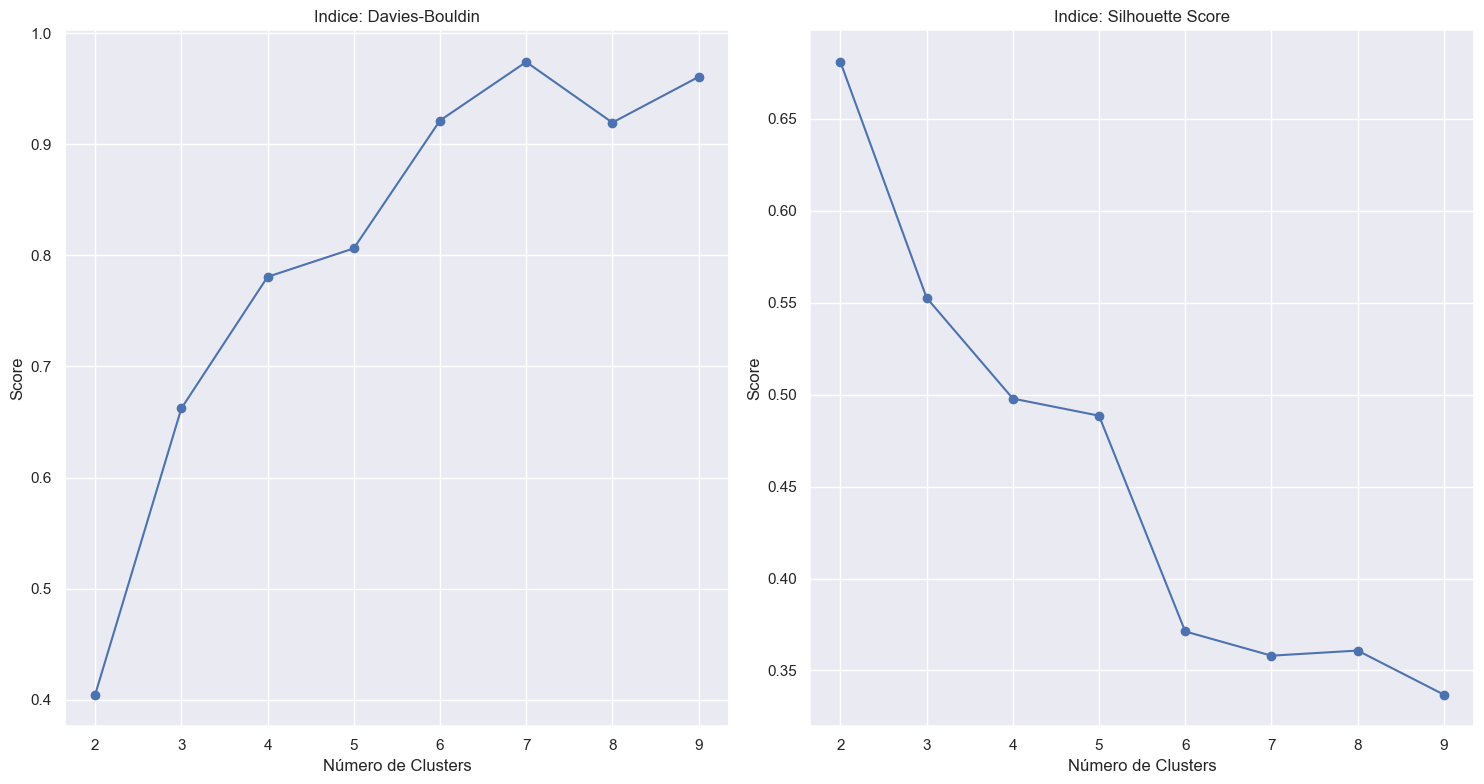

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].plot(rango_validación,  davies_bouldin_scores_2, marker='o')
axs[0].set_title('Indice: Davies-Bouldin')
axs[0].set_xlabel('Número de Clusters')
axs[0].set_ylabel('Score')

# Configuración para Silhouette Score
axs[1].plot(rango_validación, silhouette_scores_2, marker='o')
axs[1].set_title('Indice: Silhouette Score')
axs[1].set_xlabel('Número de Clusters')
axs[1].set_ylabel('Score')

# Ajuste automático del diseño
plt.tight_layout()
plt.show()

Analizando los gráficos anteriores podemos concluir cosas similares, pues para el incide de Davies-Bouldin teneos que el valor mínimo se encuentra en 2 y para el indice de Silhouetteel valor mas cercano a 1 es 2.
Podemos afirmar que computacionalmente es mas costoso usar las variables completas y obtenemos un indice similar con el uso de PCA con dos componentes por lo que usando PCA reducimos el tamaño y obtenemos resultados que generalizan el comportamiento general de la base.

<font color="red">**5. The value located at dataset matrix position (26,1) multiple by 2.0. You can try with others values or with several values simultaneously and let’s see what happen it, when clustering methods process the original dataset X or the reduced dataset obtained with PCA or SVD.**</font>

Ahora agregemos ruido a nuestra data afexctando algunos valores por un factor de 2 para ver que sucede con los datos atípicos

In [29]:
numerical_modify = iris.iloc[:,:4].copy()   #creamos una copia del data set original

In [30]:
# modifiquemos 3 valores para cada categoria

numerical_modify.iloc[26, 0] = 2 * numerical_modify.iloc[26, 0] 
numerical_modify.iloc[50, 0] = 2 * numerical_modify.iloc[10, 0]
numerical_modify.iloc[149, 0] = 2 * numerical_modify.iloc[20, 0] 

# modifiquemos 3 valores para cada categoria
numerical_modify.iloc[26, 1] = 2 * numerical_modify.iloc[26, 1] 
numerical_modify.iloc[50, 1] = 2 * numerical_modify.iloc[10, 1]
numerical_modify.iloc[149, 1] = 2 * numerical_modify.iloc[20, 1] 


# modifiquemos 3 valores para cada categoria
numerical_modify.iloc[26, 2] = 2 * numerical_modify.iloc[26, 2] 
numerical_modify.iloc[50, 2] = 2 * numerical_modify.iloc[10, 2]
numerical_modify.iloc[149, 2] = 2 * numerical_modify.iloc[20, 2] 

# modifiquemos 3 valores para cada categoria
numerical_modify.iloc[26, 3] = 2 * numerical_modify.iloc[26, 3] 
numerical_modify.iloc[50, 3] = 2 * numerical_modify.iloc[10, 3]
numerical_modify.iloc[149, 3] = 2 * numerical_modify.iloc[20, 3] 




vemos como queda esta modificación en el dataset original, por lo que aplicamos el mismo proceso de PCA con estos outliers


In [31]:
#estandarizamos con los outliers
scaler = StandardScaler()


X_estandarizado_2 = scaler.fit_transform(numerical_modify)

In [32]:
pca_2 = PCA()
X_pca_2 = pca_2.fit_transform(X_estandarizado_2)

In [33]:
j  = 1
for i in pca_2.explained_variance_ratio_:
    print(f"La varianza explicada de la componente {j} es {round(i,2)}")
    j+=1

La varianza explicada de la componente 1 es 0.62
La varianza explicada de la componente 2 es 0.35
La varianza explicada de la componente 3 es 0.03
La varianza explicada de la componente 4 es 0.0


In [34]:
j  = 1
acumulative = np.cumsum(pca_2.explained_variance_ratio_)/np.sum(pca_2.explained_variance_ratio_)
for i in acumulative:
    print(f"La varianza acumulada de la componente {j} es {round(i,2)}")
    j+=1

La varianza acumulada de la componente 1 es 0.62
La varianza acumulada de la componente 2 es 0.97
La varianza acumulada de la componente 3 es 1.0
La varianza acumulada de la componente 4 es 1.0


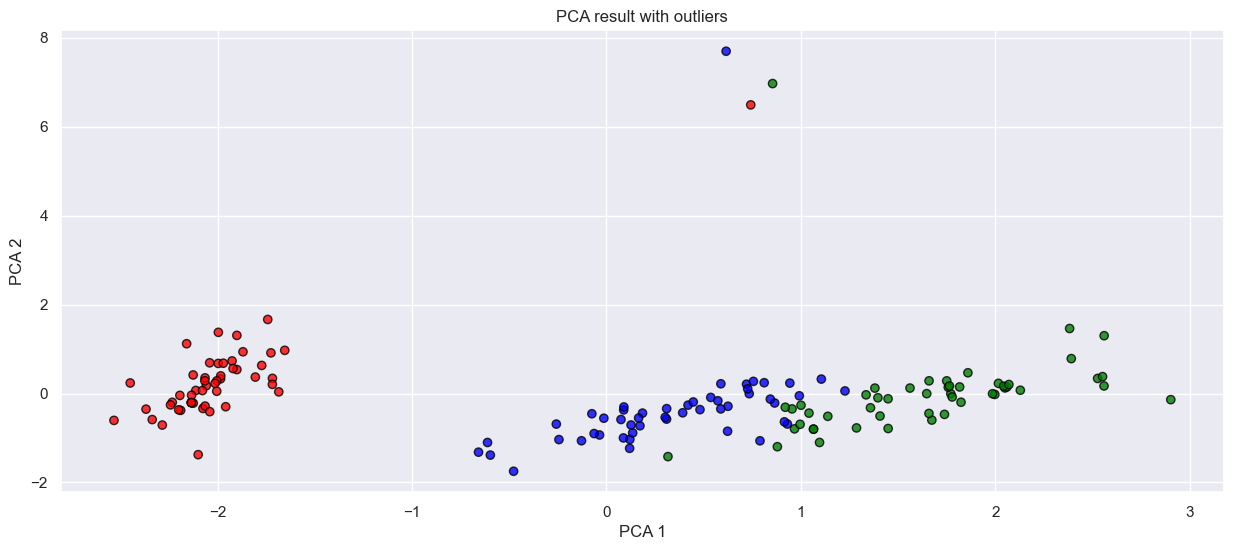

In [35]:
## visualización
plt.figure(figsize=(15,6))
sns.set()
colores = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}


plt.scatter(X_pca_2[:,0],X_pca_2[:,1],alpha=0.8,c=iris['Species'].map(colores),edgecolor="black")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.title("PCA result with outliers")

plt.show()

Podemos darnos cuenta que el primer impacto en los datos atípicos es en la varianza explicada pues vemos que ahora el primer componente solo explica un 62% cuando antes explicaba un 73%.Ahora, al tener un dato atípico de cada categoria, se validará que sucede dentro el preformance de los algoritmos de clusterización

### kmeans con 2 componentes en data con outliers

In [36]:
outliers_pca=pd.concat([pd.DataFrame(X_pca_2[:,0]),pd.DataFrame(X_pca_2[:,1])],axis=1)

In [37]:
# Definamos un rango de validación, en nuestro caso con 2 clusters hasta 10
rango_validación = range(2,10) 

davies_bouldin_scores_out = []    #guardaremos nuestros resultados de cada iteración en estas listas
silhouette_scores_out = []


for n in rango_validación:
    
    kmeans = KMeans(n_clusters=n)
    
    kmeans.fit(outliers_pca)

    # Predecimos los clusters
    labels = kmeans.labels_

    # guardamos métrica davies_bouldin
    davies_bouldin = davies_bouldin_score(outliers_pca, labels)
    davies_bouldin_scores_out.append(davies_bouldin)

    # guardamos métrica Silhouette Score
    silhouette = silhouette_score(outliers_pca, labels)
    silhouette_scores_out.append(silhouette)



Veamos los resultados obtenidos

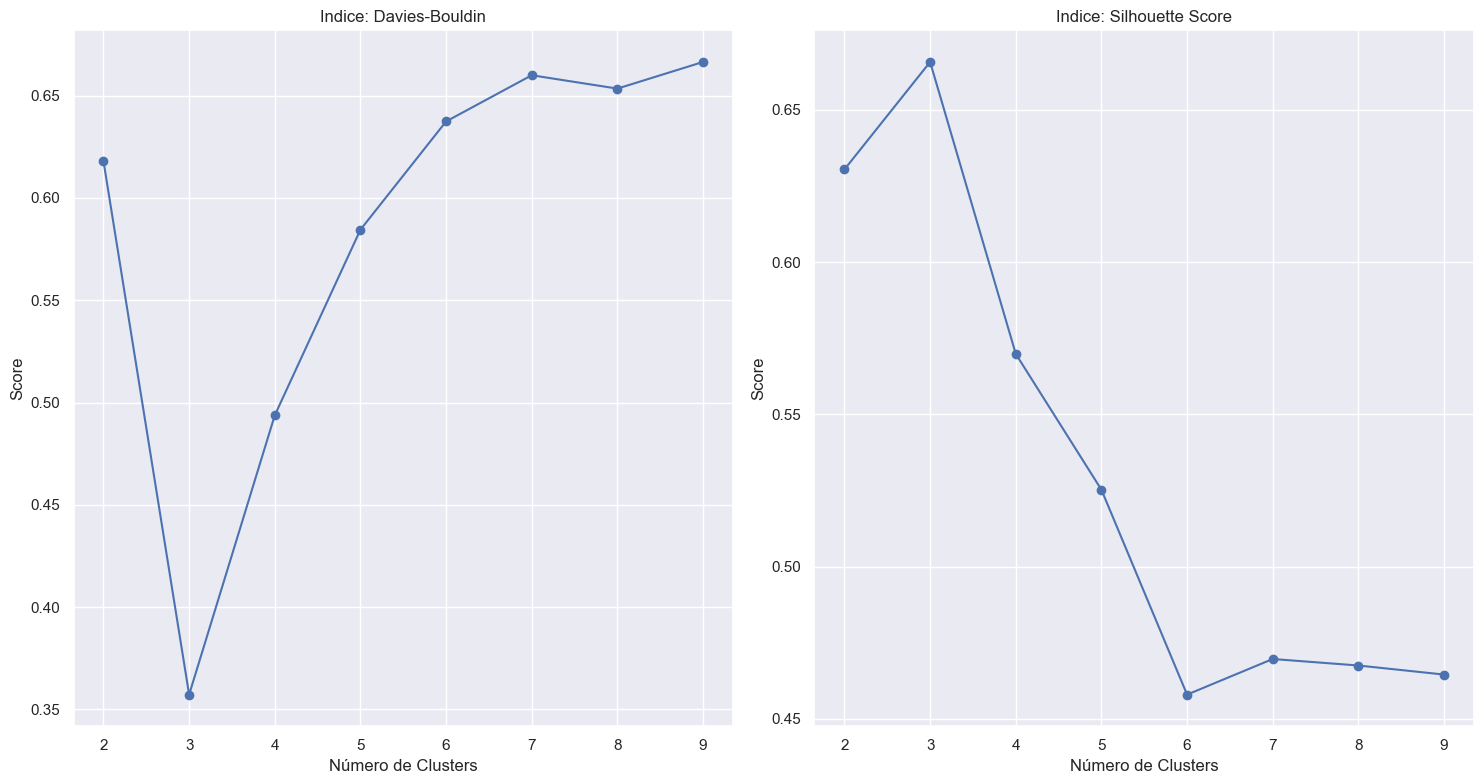

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].plot(rango_validación, davies_bouldin_scores_out, marker='o')
axs[0].set_title('Indice: Davies-Bouldin')
axs[0].set_xlabel('Número de Clusters')
axs[0].set_ylabel('Score')

# Configuración para Silhouette Score
axs[1].plot(rango_validación, silhouette_scores_out, marker='o')
axs[1].set_title('Indice: Silhouette Score')
axs[1].set_xlabel('Número de Clusters')
axs[1].set_ylabel('Score')

# Ajuste automático del diseño
plt.tight_layout()
plt.show()

Como podemos ver, en este caso, los indices se ven altamente afectados por outliers por lo que considera que estos son un solo grupo, generando conslusiones erroneas. En nuestro caso original vimos que por el solapamiento de clases el algortmo presentaba 2 clusters generales, pero para la data con outlier sugiere que al tener datos atipicos, estos son un cluster adicional, por lo que tenemos un nuevo cluster generado por ellos, es por esto que para estos casos vemos que ambos indices tienen su mejor preformance en 3, el de Silhouette con el valor máximo y el de Davies-Bouldin con su valor mínimo.
Grafiquemos nuestros clusters para ver su asignación

In [39]:
 
kmeans_out = KMeans(n_clusters=3)
    
kmeans_out.fit(outliers_pca)

 # Predecimos los clusters
labels = kmeans_out.labels_

In [40]:
k_means_outliers = pd.concat([outliers_pca,pd.DataFrame(labels)],axis=1)

In [41]:
centroids_outliers = pd.DataFrame(kmeans_out.cluster_centers_)

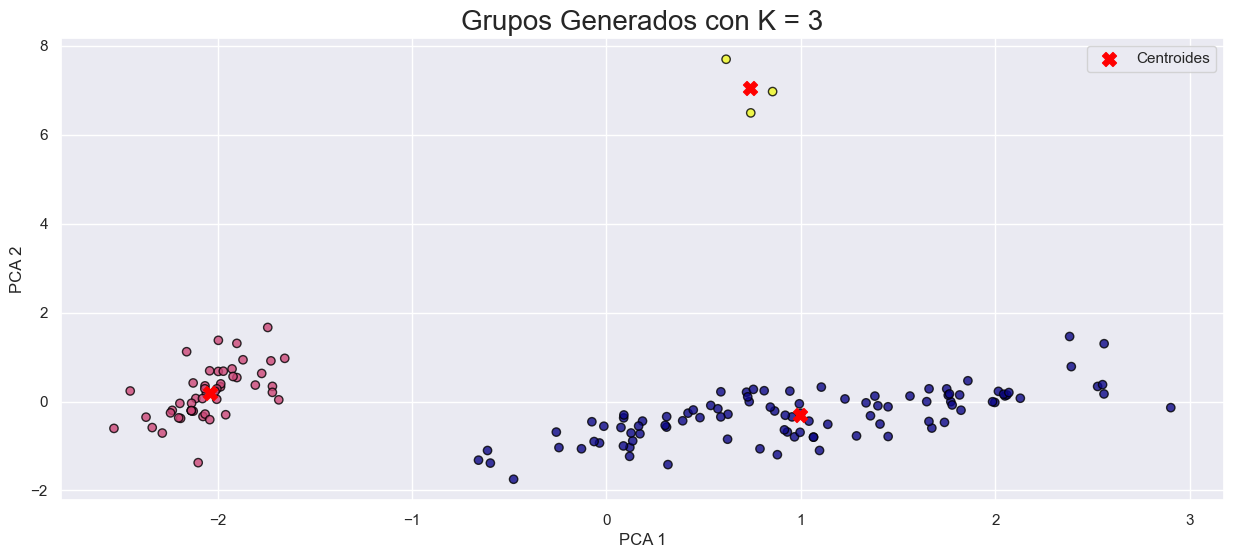

In [42]:
# Graficar los puntos y los centroides coloreados por cluster
plt.figure(figsize=(15,6))

plt.scatter(k_means_outliers.iloc[:, 0], k_means_outliers.iloc[:, 1], c=labels, cmap='plasma', alpha=0.8, edgecolor="black")
plt.scatter(centroids_outliers.iloc[:, 0], centroids_outliers.iloc[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.legend()

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Grupos Generados con K = 3",fontsize=20)
plt.show()

En el gráfico de arriba vemos como los outliers fueron mal asignados, pues los considera como un solo grupo aparte, sabiendo por inicio que eran grupos diferentes, esta problematica la encontramos en este tipo de indices para validar pues con datos atípicos al centrarse en distancias estos generan una distroción dandole la improtancia a los outliers como subgrupos nuevos.

<font color="red">**6. Apply the algorithms: Spectral clustering and two selected validation indexes (suggestion: Davies-Bouldin index and Silhouette) to determine the optimal number of groups and provide some discussion about the results.**</font>

### Data con outliers

Aplicamos el algoritmo de clustering spectral, el cual al basarse en matrices de afinidad tiene una menor sensibilidad a los datos atípicos.

In [43]:
from sklearn.cluster import SpectralClustering

In [60]:
# Definamos un rango de validación, en nuestro caso con 2 clusters hasta 10
rango_validación = range(2,10) 

davies_bouldin_scores_spec = []
silhouette_scores_spec = []


for n in rango_validación:
    # ajustamos kmeans
    spectral = SpectralClustering(n_clusters=n, affinity ='nearest_neighbors')

    # Predict clusters
    labels =  spectral.fit_predict(outliers_pca)

    # guardamos metrica davies_bouldin
    davies_bouldin = davies_bouldin_score(outliers_pca, labels)
    davies_bouldin_scores_spec.append(davies_bouldin)

    # guardamos metrica Silhouette Score
    silhouette = silhouette_score(outliers_pca, labels)
    silhouette_scores_spec.append(silhouette)


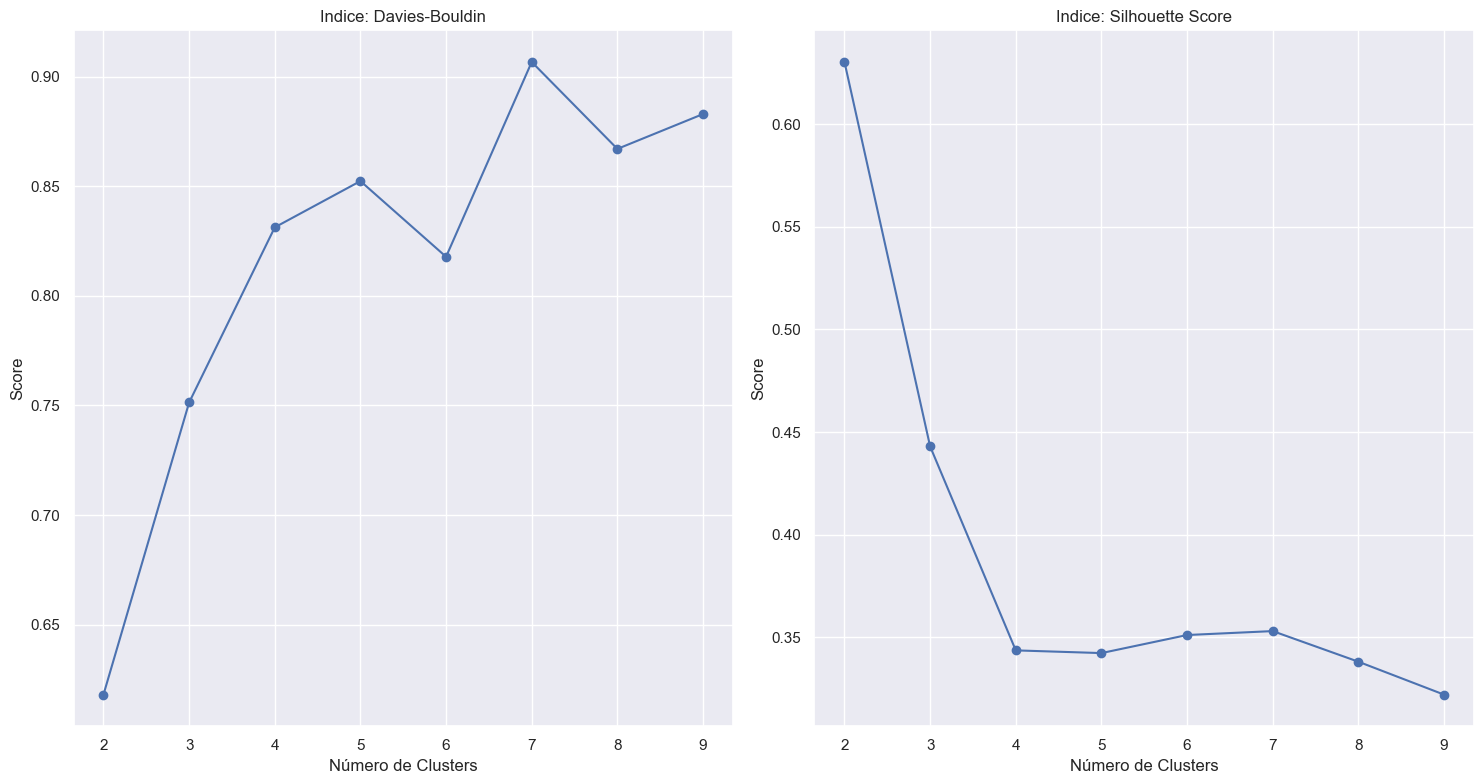

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].plot(rango_validación, davies_bouldin_scores_spec, marker='o')
axs[0].set_title('Indice: Davies-Bouldin')
axs[0].set_xlabel('Número de Clusters')
axs[0].set_ylabel('Score')

# Configuración para Silhouette Score
axs[1].plot(rango_validación, silhouette_scores_spec, marker='o')
axs[1].set_title('Indice: Silhouette Score')
axs[1].set_xlabel('Número de Clusters')
axs[1].set_ylabel('Score')

# Ajuste automático del diseño
plt.tight_layout()
plt.show()

Con lo anterior vermos como nuestro método sugiere como parametro la existencia de 2 clusters, teniendo su mayor valor de Silhouette en 2 y el menor valor de  Davies-Bouldin en el mismo número. Para la matriz de afinidad seleccionamos el método de vecinos cercanos,e ste tiene mayor eficacia cuando tenemos datos con mas ruido y no en ovoides tan definidos

In [63]:
spectral = SpectralClustering(n_clusters=2, affinity ='nearest_neighbors')

# Predict clusters
labels =  spectral.fit_predict(outliers_pca)

In [64]:
spectral_outliers = pd.concat([outliers_pca,pd.DataFrame(labels)],axis=1)

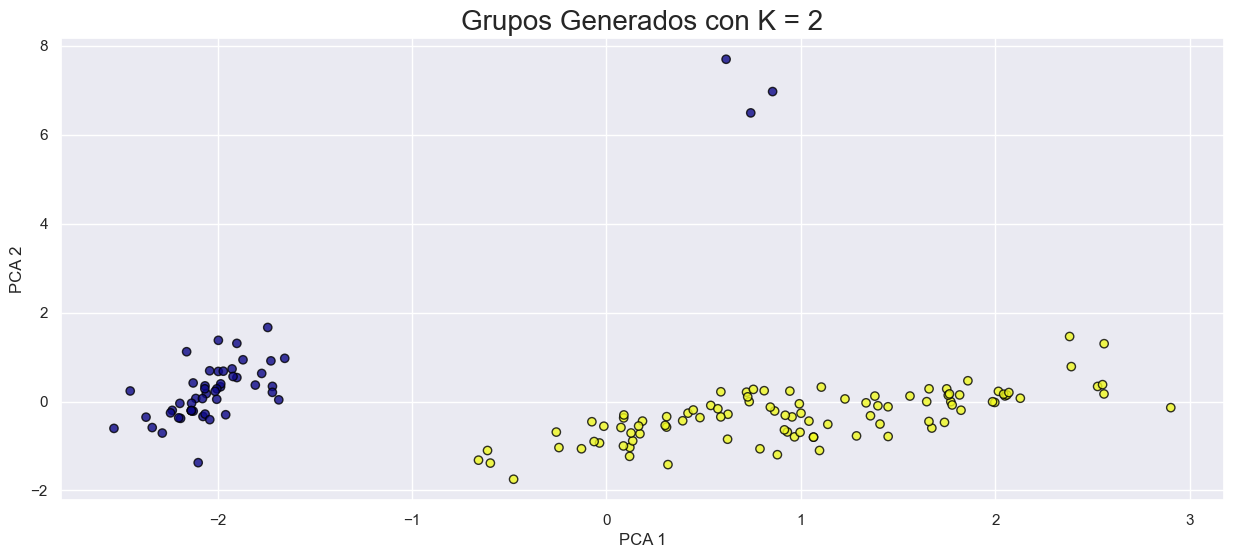

In [65]:
# Graficar los puntos 
plt.figure(figsize=(15,6))

plt.scatter(spectral_outliers.iloc[:, 0], spectral_outliers.iloc[:, 1], c=labels, cmap='plasma', alpha=0.8, edgecolor="black")


plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Grupos Generados con K = 2",fontsize=20)
plt.show()

Dado el gráfico anterios validamos que este método es menos sensible a datos atípicos y nos funciona cuando tenemos ruido. Si bien los atípicos no los clasifico bien , es preferible integrarlos a un grupo que generarlos como un cluster diferente.

### Data sin outliers

In [49]:
# Definamos un rango de validación, en nuestro caso con 2 clusters hasta 10
rango_validación = range(2,10) 

davies_bouldin_scores_spec2 = []
silhouette_scores_spec2 = []


for n in rango_validación:
    # ajustamos kmeans
    spectral = SpectralClustering(n_clusters=n)

    # Predict clusters
    labels =  spectral.fit_predict(pca_data.iloc[:,:2])

    # guardamos metrica davies_bouldin
    davies_bouldin = davies_bouldin_score(pca_data.iloc[:,:2], labels)
    davies_bouldin_scores_spec2.append(davies_bouldin)

    # guardamos metrica Silhouette Score
    silhouette = silhouette_score(pca_data.iloc[:,:2], labels)
    silhouette_scores_spec2.append(silhouette)


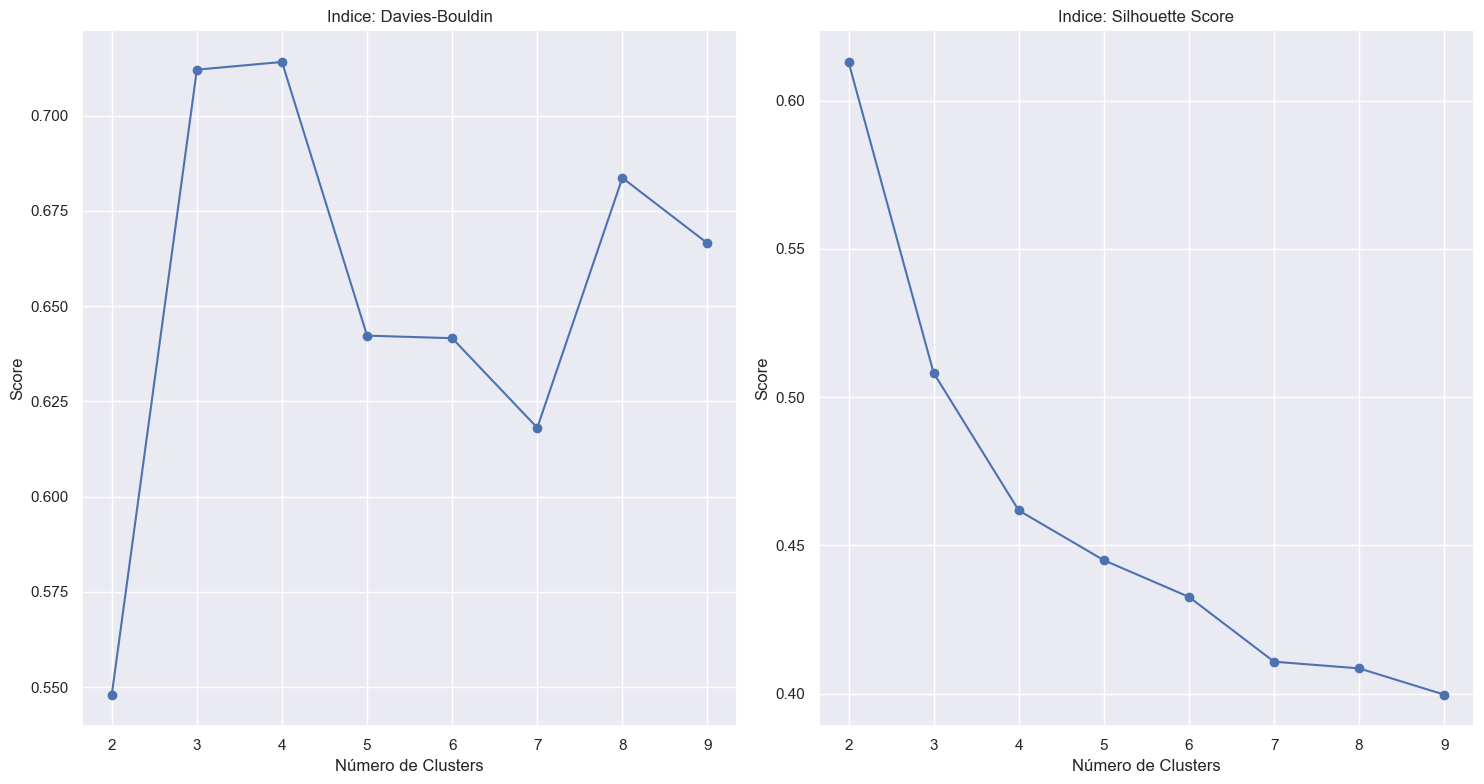

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

axs[0].plot(rango_validación, davies_bouldin_scores_spec2, marker='o')
axs[0].set_title('Indice: Davies-Bouldin')
axs[0].set_xlabel('Número de Clusters')
axs[0].set_ylabel('Score')

# Configuración para Silhouette Score
axs[1].plot(rango_validación, silhouette_scores_spec2, marker='o')
axs[1].set_title('Indice: Silhouette Score')
axs[1].set_xlabel('Número de Clusters')
axs[1].set_ylabel('Score')

# Ajuste automático del diseño
plt.tight_layout()
plt.show()

Sin los outliers tenemos un comportamiento similar a los vistos inicialmente, presentando como mejor opcion dos grupos dentro de nuestros clusters.

In [51]:
spectral = SpectralClustering(n_clusters=2)

# Predict clusters
labels =  spectral.fit_predict(pca_data.iloc[:,:2])

In [52]:
spectral_data = pd.concat([pca_data.iloc[:,:2],pd.DataFrame(labels)],axis=1)

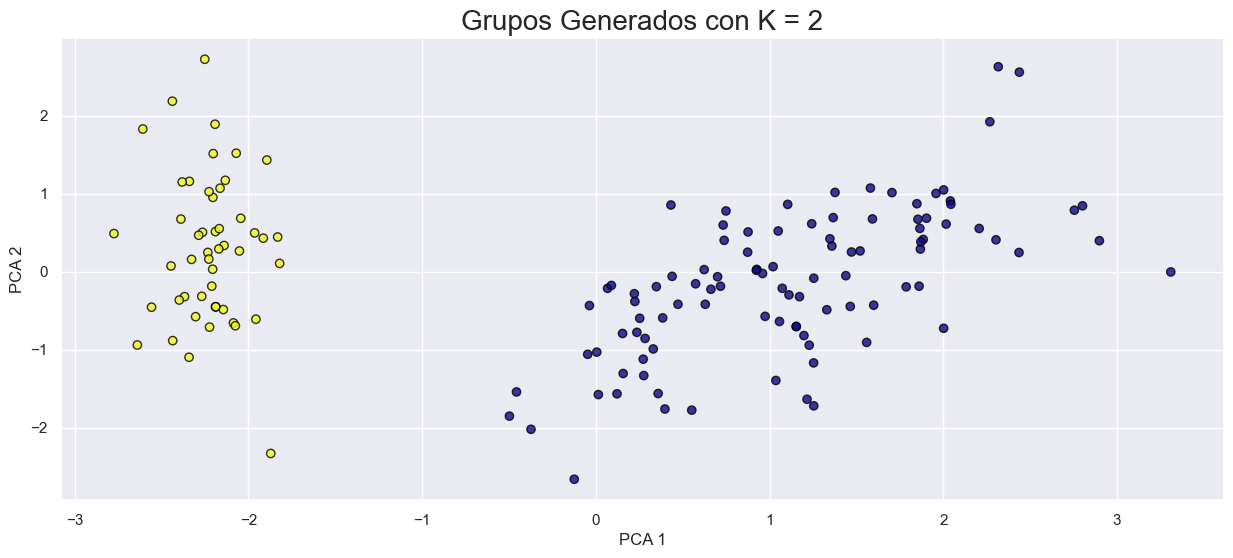

In [53]:
# Graficar los puntos 
plt.figure(figsize=(15,6))

plt.scatter(spectral_data.iloc[:, 0],spectral_data.iloc[:, 1], c=labels, cmap='plasma', alpha=0.8, edgecolor="black")


plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Grupos Generados con K = 2",fontsize=20)
plt.show()

De la misma manera que con K means, tenemos que estos algoritmos buscan maximizar la distancia extra cluster, y minimizar la distancia intra cluster, motivo por el cual al tener solapamiento de clases nos sugiere que estas son una misma clase, ya que en terminos matematicos esto cumple el criterio mencionado en un inicio.

### comparamos con el resultado real k = 3

Dado el análisis anterior, y bajo el supuesto de que sabemos cuantos grupos iniciales hay, validemos la eficacia del método espectral en comparación con la data real.

In [66]:
spectral = SpectralClustering(n_clusters=3,affinity ='rbf')

# Predict clusters
labels =  spectral.fit_predict(pca_data.iloc[:,:2])

In [67]:
spectral_data = pd.concat([pca_data.iloc[:,:2],pd.DataFrame(labels)],axis=1)

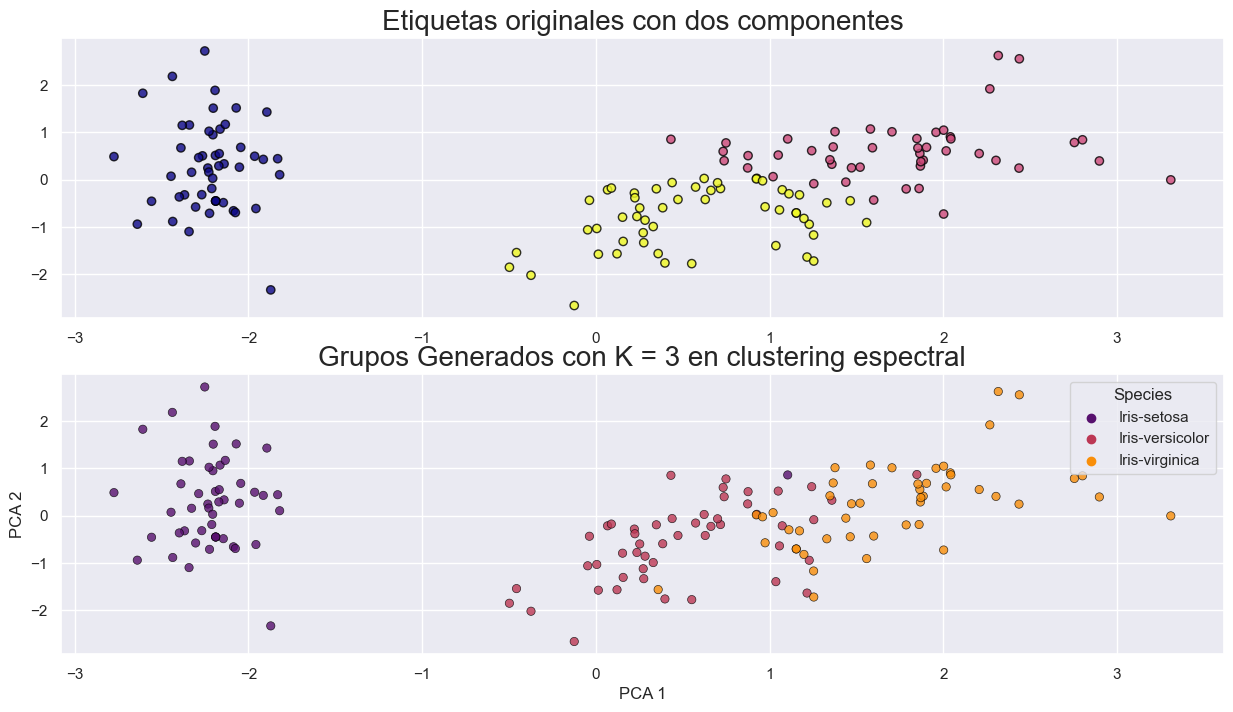

In [73]:
# Graficar los puntos 

fig, axs = plt.subplots(2, 1, figsize=(15, 8))
axs[0].scatter(spectral_data.iloc[:, 0],spectral_data.iloc[:, 1], c=labels, cmap='plasma', alpha=0.8, edgecolor="black")
axs[0].set_title("Etiquetas originales con dos componentes", fontsize=20)

sns.scatterplot(x=spectral_data.iloc[:, 0], y=spectral_data.iloc[:, 1], hue=iris['Species'],
                palette='inferno', alpha=0.8, edgecolor="black", ax=axs[1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Grupos Generados con K = 3 en clustering espectral",fontsize=20)
plt.show()

Validamos que teniendo más contexto el clustering espectral es una buena herramienta para agrupar, pues es menos sensible a datos atípicos y presenta una relacion correcta con la data original en el caso donde comparamos con las etiquetas originales. Vemos como el problema se generá en la solapación de clase pero apesar de esto presenta un buen preformance.

##  <font color="#008080">Discusión  </font>

**Sensibilidad de K-means y la importancia de la reducción de dimensionalidad:**

La aplicación de K-means en datos originales reveló la eficacia del algoritmo en la formación de clusters, pero también resaltó su susceptibilidad a la dimensionalidad. La implementación de análisis de componentes principales (PCA) permitió una representación más clara de la estructura de los datos en un espacio bidimensional. Esto sugiere que la reducción de dimensionalidad puede ser crucial para visualizar y comprender patrones intrínsecos en conjuntos de datos complejos, mejorando la interpretación de los resultados de K-means.  

**Impacto de outliers en la formación de clusters:**

La inclusión deliberada de outliers en el análisis reveló una vulnerabilidad significativa en K-means frente a estos valores atípicos. La alteración sustancial en la posición y forma de los clusters subraya la necesidad de estrategias de preprocesamiento y detección de outliers antes de aplicar algoritmos de clustering. Estos resultados respaldan la importancia de abordar datos atípicos de manera proactiva para mejorar la robustez y la fiabilidad de los resultados de K-means.  

**Ventajas de clustering espectral en presencia de outliers:**

La transición hacia la validación de clusters mediante clustering espectral arrojó luz sobre las ventajas de esta técnica sobre K-means en entornos con presencia de outliers. Clustering espectral demostró ser más resistente a la influencia negativa de datos atípicos, generando clusters más coherentes y significativos. Este hallazgo destaca la necesidad de considerar enfoques alternativos, como clustering espectral, especialmente en situaciones donde la presencia de outliers es una preocupación importante.  

**Evaluación cuantitativa de la calidad de los clusters:**

La utilización de los índices de Davies-Bouldin y Silhouette proporcionó una evaluación cuantitativa objetiva de la calidad de los clusters generados por ambos algoritmos. Estos índices demostraron ser herramientas valiosas para medir la cohesión y la separación de los clusters, proporcionando una base sólida para la comparación entre K-means y clustering espectral. La elección de métricas de evaluación robustas es esencial para garantizar la objetividad en la comparación de algoritmos de clustering en diferentes escenarios. Como punto a comentar se tiene que estos indices tienen una prevalencia por la varianza y distancias por lo que los datos atípicos podrian corromper la interpretación de los mismos, valdría la pena explorar métodos adicionales que hagan frente al ruido en la data.

**Consideraciones para futuras investigaciones:**

Este estudio sugiere varias direcciones para futuras investigaciones. Se podrían explorar enfoques adicionales de reducción de dimensionalidad y técnicas de detección de outliers más avanzadas. Asimismo, podrían investigarse a fondo otras métricas de evaluación de clusters y su aplicabilidad en diferentes contextos. Además, la aplicación de estos algoritmos en conjuntos de datos del mundo real podría proporcionar una comprensión más completa de su desempeño y aplicabilidad práctica.



##  <font color="#008080">Conclusión </font>

En este estudio, exploramos la efectividad del algoritmo K-means en la agrupación de datos, tanto en su forma original como después de ser procesado con análisis de componentes principales (PCA) para reducir la dimensionalidad a dos componentes principales. Observamos cómo la introducción de outliers afecta los resultados de los cálculos de clusters, destacando la sensibilidad de K-means a la presencia de datos atípicos.

Inicialmente, implementamos K-means en datos normales y evaluamos la calidad de los clusters generados utilizando métricas fundamentales como el indice de Davies-Bouldin y Silhouette. Luego, aplicamos PCA para reducir la complejidad del conjunto de datos, permitiendo una visualización más efectiva en un espacio bidimensional. Esta transformación reveló patrones y estructuras en los datos que podrían haber pasado desapercibidos en dimensiones más altas.

Posteriormente, introducimos outliers en el conjunto de datos y observamos cómo estos valores atípicos impactaron significativamente en la formación de los clusters con K-means. La presencia de outliers generó distorsiones en la posición y forma de los clusters, lo que subraya la importancia de la detección y gestión de datos atípicos en la aplicación de algoritmos de clustering.

Finalmente, exploramos la validación de clusters mediante clustering espectral, una técnica que utiliza la matriz de afinidad para agrupar datos. Utilizamos los índices de Davies-Bouldin y Silhouette para evaluar la cohesión y separación de los clusters generados por K-means y clustering espectral. Los resultados demostraron que, en presencia de outliers, el clustering espectral presentaba ventajas sobre K-means, ya que mostraba una mayor resistencia a la influencia negativa de datos atípicos.

En resumen, este trabajo proporciona una visión detallada de la implementación de K-means, destacando su vulnerabilidad ante outliers y proponiendo el uso de técnicas de reducción de dimensionalidad y clustering espectral como estrategias complementarias para mejorar la robustez del algoritmo. Los índices de Davies-Bouldin y Silhouette emergieron como herramientas útiles para cuantificar y comparar la calidad de los clusters, proporcionando una base objetiva para la evaluación de algoritmos de agrupación en presencia de datos desafiantes.